### Student Information
Name: 詹睿軒

Student ID: 113062543

GitHub ID: Big-problem

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# First Part

In [2]:
### Begin Assignment Here

import math

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

import helpers.data_mining_helpers as dmh

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import nltk

from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
from PAMI.frequentPattern.topk import FAE as top_alg



d:\VirtualEnv\datamining3.9.6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [5]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])

---

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [7]:
#Answer here
# Access only one value can use at and iat
print(X.at[3, 'category_name']) # by label

print(X.iat[3, 2]) # by index

soc.religion.christian
soc.religion.christian


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [11]:
# Answer here
# For {'NaN', 'None', ''}, python consider them as strings, so the  results are False
# As for {np.nan, , None}, they are considered as missing value, so the results are True

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
X_sample = X.sample(n=1000) #random state

X_sample

,text,category,category_name
1211,From: paulson@tab00.larc.nasa.gov (Sharon Paul...,2,sci.med
1037,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian
817,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
2179,From: ednclark@kraken.itc.gu.edu.au (Jeffrey C...,0,alt.atheism
1538,From: morgan@socs.uts.edu.au Subject: re: tech...,3,soc.religion.christian
...,...,...,...
1054,From: aa888@freenet.carleton.ca (Mark Baker) S...,3,soc.religion.christian
787,From: Deon.Strydom@f7.n7104.z5.fidonet.org (De...,3,soc.religion.christian
2059,From: ederveen@athena.research.ptt.nl (Edervee...,1,comp.graphics
906,From: SITUNAYA@IBM3090.BHAM.AC.UK Subject: tes...,1,comp.graphics


In [13]:
# Answer here
# After X.sample(n=1000), we will randomly get 1000 records of X. The results are random and shuffled. The index stays the same and doesn't re-index from 0 to 999

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

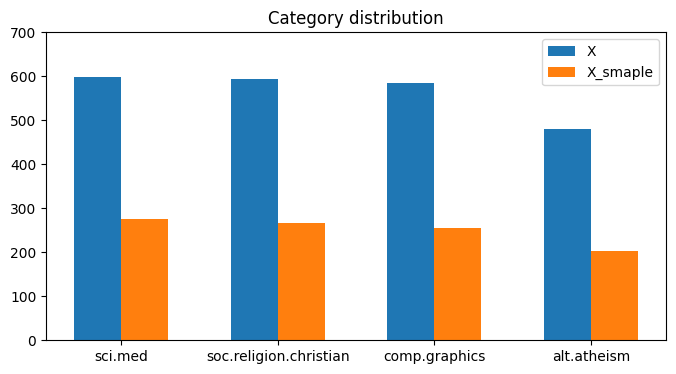

In [14]:
l1, l2, l3 = [0,1,2,3], [0.3,1.3,2.3,3.3], [0.15,1.15,2.15,3.15]
categories.sort(key = lambda x : X_sample.category_name.value_counts()[x], reverse=True)

plt.figure(figsize=(8, 4))
plt.bar(l1, X.category_name.value_counts(), 0.3, label = 'X')
plt.bar(l2, X_sample.category_name.value_counts(), 0.3, label = 'X_smaple')

plt.title('Category distribution')
plt.xticks(ticks=l3, labels=categories, rotation=0, ha='center')
plt.ylim(0, 700)
plt.legend()

plt.show()

---

In [15]:
# takes a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [16]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(14887))	1
  (np.int32(0), np.int32(29022))	1
  (np.int32(0), np.int32(8696))	4
  (np.int32(0), np.int32(4017))	2
  (np.int32(0), np.int32(33256))	2
  (np.int32(0), np.int32(21661))	3
  (np.int32(0), np.int32(9031))	3
  (np.int32(0), np.int32(31077))	1
  (np.int32(0), np.int32(9805))	2
  (np.int32(0), np.int32(17366))	1
  (np.int32(0), np.int32(32493))	4
  (np.int32(0), np.int32(16916))	2
  (np.int32(0), np.int32(19780))	2
  (np.int32(0), np.int32(17302))	2
  (np.int32(0), np.int32(23122))	1
  (np.int32(0), np.int32(25663))	1
  (np.int32(0), np.int32(16881))	1
  (np.int32(0), np.int32(16082))	1
  (np.int32(0), np.int32(23915))	1
  (np.int32(0), np.int32(32142))	5
  (np.int32(0), np.int32(33597))	2
  (np.int32(0), np.int32(20253))	1
  (np.int32(0), np.int32(587))	1
  (np.int32(0), np.int32(12051))	1
  (np.int32(0), np.int32(5201))	1
  :	:
  (np.int32(0), np.int32(25361))	1
  (np.int32(0), np.int32(25337))	1
  (np.int32(0), np.int32(12833))	2
  (np.int32(0), np.in

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
# Answer here
count_vect.get_feature_names_out()[37]

'01'

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

My approach:
I still choose first 20 documents in this heatmap. As for the terms, i make sure that every column should have at least one non-zero terms. I scan from the beginning and pick the first 20 terms that satisfy this requierement

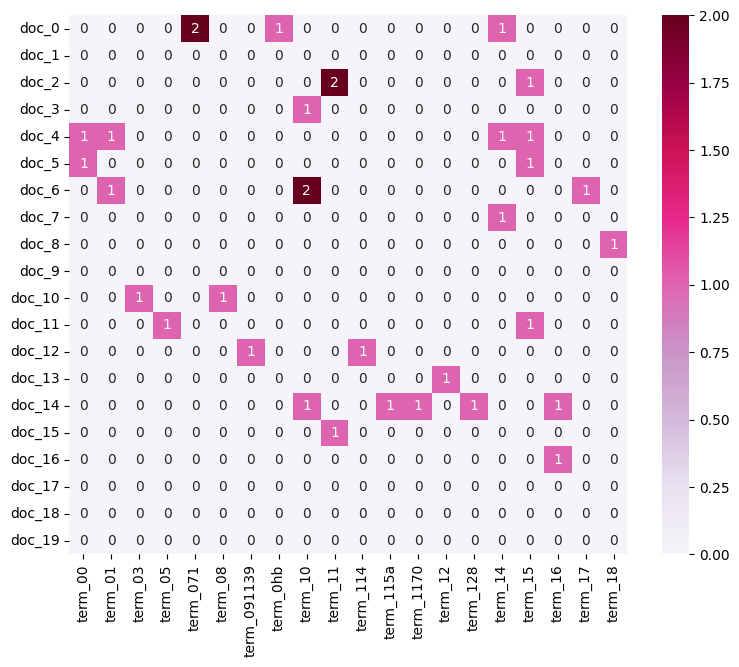

In [18]:
# Answer here

total = 0
arr = X_counts[0:20, 0:].toarray()
plot_x, plot_z = [], []
for i in range(20):
    tmp = []
    for i in range(20):
        tmp.append(-1)
    plot_z.append(tmp)

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
for i in range(X_counts.shape[1]):
    flag = 0
    for j in range(20):
        plot_z[j][total] = arr[j][i]
        if arr[j][i] != 0:
            flag = 1

    if flag:
        total += 1
        plot_x.append("term_"+str(count_vect.get_feature_names_out()[i]))
        if total == 20:
            break

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [19]:
l = np.asarray(X_counts[:, :300].sum(axis=0))[0]
x = [i for i in count_vect.get_feature_names_out()[:300]]
df = pd.DataFrame({'Term': x,
                   'Term Freauency': l})

In [20]:
fig = px.bar(df, x='Term', y='Term Freauency',
             hover_data=['Term', 'Term Freauency'], color='Term Freauency',
             title='Term Freauency'
            )
fig.update_layout(font_size=11)
fig.show()

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [21]:
# I select 100 terms which appear more than 20 times
l = np.asarray(X_counts[:, :].sum(axis=0))[0]
x, y = [], []
total = 0
for i in range(len(l)):
    if l[i] >= 20:
        x.append(count_vect.get_feature_names_out()[i])
        y.append(l[i])
        total += 1
    if total > 100:
        break
df = pd.DataFrame({'Term': x,
                   'Term Freauency': y})

In [22]:
fig = px.bar(df, x='Term', y='Term Freauency',
             hover_data=['Term', 'Term Freauency'], color='Term Freauency',
             title=' 100 Terms occurrence more than 20 times'
            )
fig.update_layout(font_size=11)
fig.show()

---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [23]:
# i select the top 300 most frequent terms
x = [i for i in count_vect.get_feature_names_out()]
y, x = zip(*sorted(zip(l, x)))
y = list(reversed(y))
x = list(reversed(x))
df = pd.DataFrame({'Term': x[:300], 'Term Freauency': y[:300]})
fig = px.bar(df, x='Term', y='Term Freauency',
             hover_data=['Term', 'Term Freauency'], color='Term Freauency',
             title=' Top 300 most frequent terms'
            )
fig.update_layout(font_size=11)
fig.show()

---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [24]:
# i select the top 2000 most frequent terms and apply log transformation
x = [i for i in count_vect.get_feature_names_out()]
y, x = zip(*sorted(zip(l, x)))
y = list(reversed(y))
x = list(reversed(x))
y = [math.log(i) for i in y]
df = pd.DataFrame({'Term': x[:2000], 'Term Freauency': y[:2000]})
fig = px.bar(df, x='Term', y='Term Freauency',
             hover_data=['Term', 'Term Freauency'], color='Term Freauency',
             title=' Top 2000 most frequent terms'
            )
fig.update_layout(font_size=11)
fig.show()

-------------

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [25]:
# Answer here:
# For the top 5% most frequent terms, there is a lot of similarity such as 'the', 'and', 'that'. Although these words indeed cannot tell as much what the article is about , there are still some
# frequent words that i think is vital to the article. For instance, in category 'soc.religion.christian', there are terms like 'jesus', 'church', whick i think are closely related to the category.
# As for the least 1% terms, they are mostly just number. I think that it is fine to just discard these terms.

---

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [26]:
topk, maxFPG = [], []
obj = top_alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=500)
obj.mine()
frequentPatterns1 = obj.getPatternsAsDataFrame()
topk.append(obj.getRuntime())

obj = top_alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=1000)
obj.mine()
frequentPatterns2 = obj.getPatternsAsDataFrame()
topk.append(obj.getRuntime())

obj = top_alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=1500)
obj.mine()
frequentPatterns3 = obj.getPatternsAsDataFrame()
topk.append(obj.getRuntime())

obj = max_alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=3)
obj.mine()
frequentPatterns4 = obj.getPatternsAsDataFrame()
maxFPG.append(obj.getRuntime())

obj = max_alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=6)
obj.mine()
frequentPatterns5 = obj.getPatternsAsDataFrame()
maxFPG.append(obj.getRuntime())

obj = max_alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=9)
obj.mine()
frequentPatterns6 = obj.getPatternsAsDataFrame()
maxFPG.append(obj.getRuntime())

print('FAE Top-k:')
print('k = 500:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns1)))
print('  ' + 'Runtime: ' + str(topk[0]))
print('k = 1000:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns2)))
print('  ' + 'Runtime: ' + str(topk[1]))
print('k = 1500:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns3)))
print('  ' + 'Runtime: ' + str(topk[2]))
print('MaxFPGrowth:')
print('minSup = 3:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns4)))
print('  ' + 'Runtime: ' + str(maxFPG[0]))
print('minSup = 6:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns5)))
print('  ' + 'Runtime: ' + str(maxFPG[1]))
print('minSup = 9:')
print('  ' + 'Total No of patterns: ' + str(len(frequentPatterns6)))
print('  ' + 'Runtime: ' + str(maxFPG[2]))

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
FAE Top-k:
k = 500:
  Total No of patterns: 500
  Runtime: 0.9344496726989746
k = 1000:
  Total No of patterns: 1000
  Runtime: 2.006500482559204
k = 1500:
  Total No of patterns: 1500
  Runtime: 4.238509893417358
MaxFPGrowth:
minSup = 3:
  Total No of patterns: 6872
  Runtime: 22.688091278076172
minSup = 6:
  Total No of patterns: 1340
  Runtime: 0.3967118263244629
minSup = 9:
  Total No of patterns: 660
  Runtime: 0.1111307144165039


Similarity: The higher the thershold is, less number of patterns, so the runtime is shorter


Under the same minSup, MaxFPGrowth finds a lot less number of patterns than FPGrowth does

The output of FAE top-k is sorted from larger support to lower support, while maxFPGrowth is the opposite

In general, the longer the patterns, the lower the support is

---

In [34]:
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [ ]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [36]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,means communications 192 international,brave,transplant,unlikely,deeply,holland,pl8 newsreader,pl8 tin,newsreader pl8 tin,quackery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

---

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

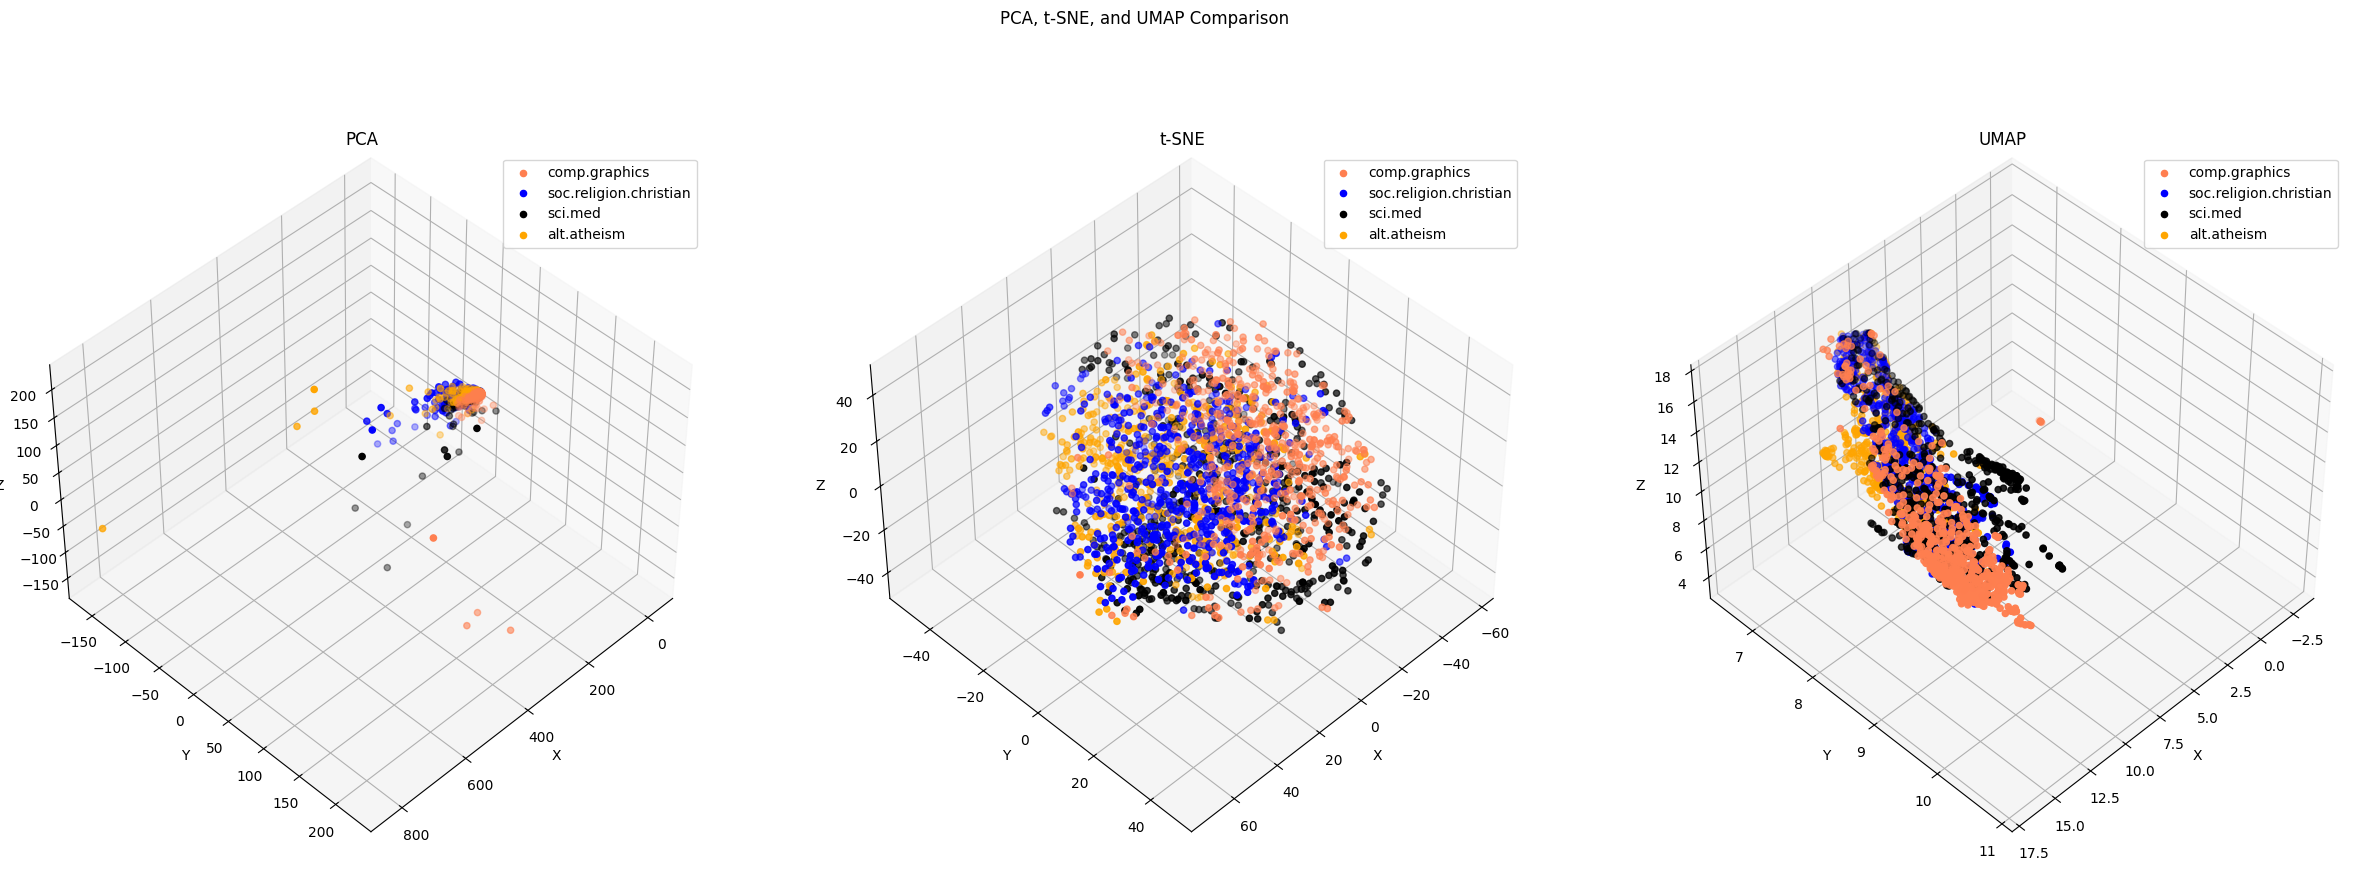

In [40]:
# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

    ax.view_init(elev=elev, azim=-azim)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')


# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(ax1, X_pca_aug, 'PCA', 45, -45)
plot_scatter(ax2, X_tsne_aug, 't-SNE', 45, -45)
plot_scatter(ax3, X_umap_aug, 'UMAP', 45, -45)



plt.show()

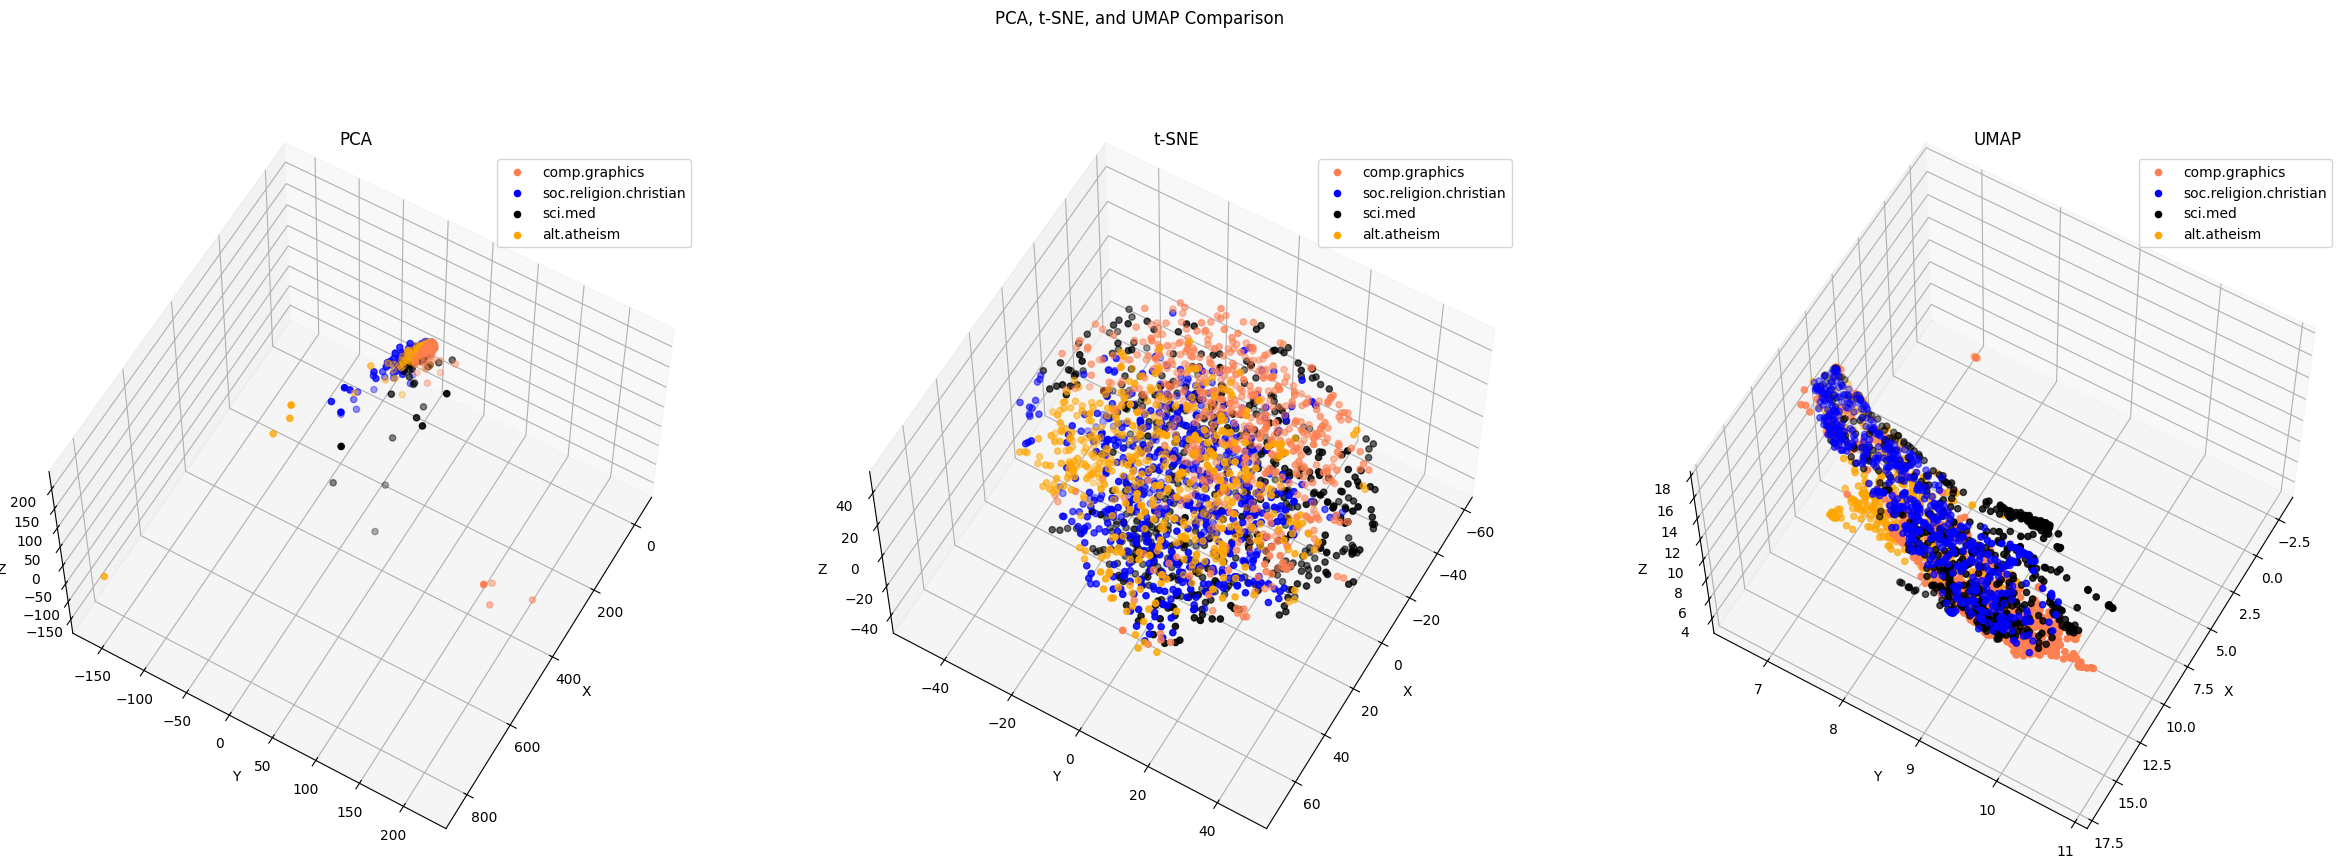

In [41]:
fig = plt.figure(figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
ax4 = fig.add_subplot(131, projection='3d')
ax5 = fig.add_subplot(132, projection='3d')
ax6 = fig.add_subplot(133, projection='3d')
plot_scatter(ax4, X_pca_aug, 'PCA', 60, -30)
plot_scatter(ax5, X_tsne_aug, 't-SNE', 60, -30)
plot_scatter(ax6, X_umap_aug, 'UMAP', 60, -30)
plt.show()

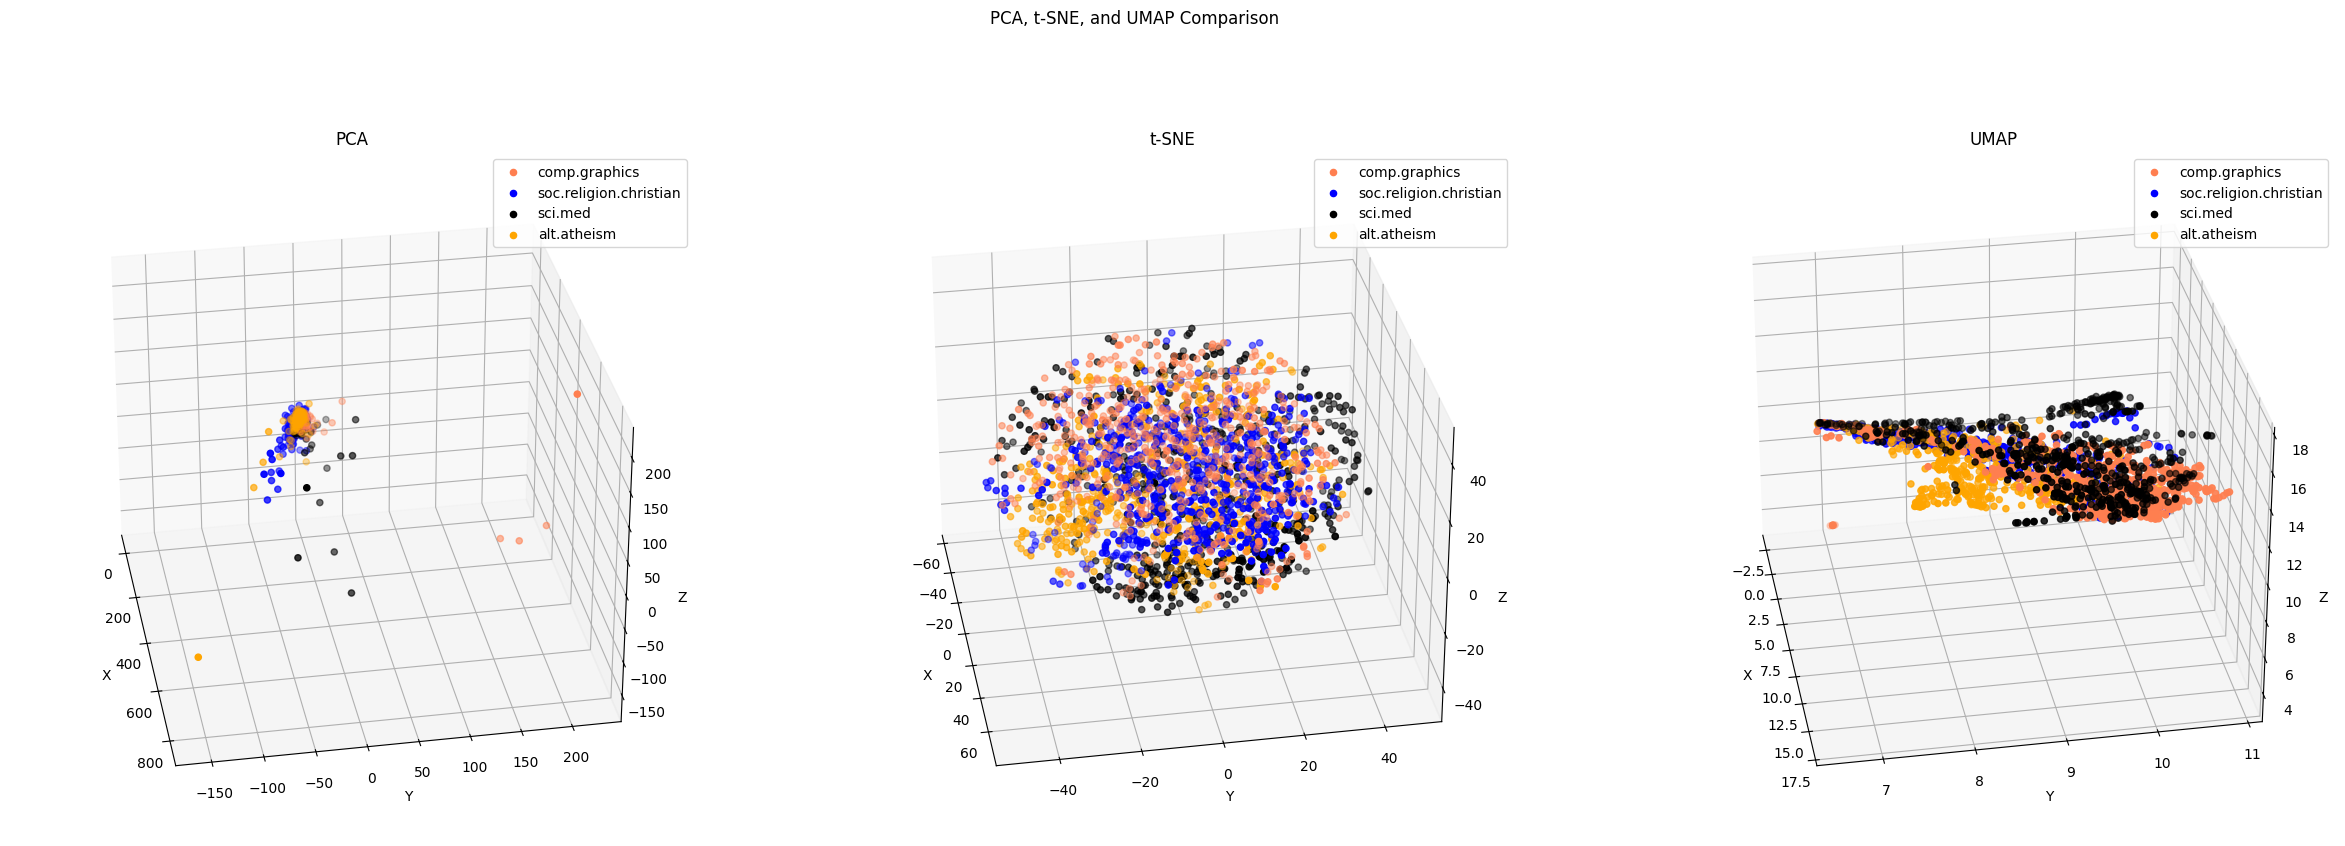

In [42]:
fig = plt.figure(figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')
ax7 = fig.add_subplot(131, projection='3d')
ax8 = fig.add_subplot(132, projection='3d')
ax9 = fig.add_subplot(133, projection='3d')
plot_scatter(ax7, X_pca_aug, 'PCA', 30, 10)
plot_scatter(ax8, X_tsne_aug, 't-SNE', 30, 10)
plot_scatter(ax9, X_umap_aug, 'UMAP', 30, 10)
plt.show()

In [ ]:
# Observation:
# The result of PCA is still stick together. 
# It looks like the result of UMAP is the best because different color doesn't stick to each other
# For ezample, from the second angle, blue dots are close to the top. From the third angle, yellow dots are close to the moniter

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [50]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[:8]

# Yes, it works.

,text,category,category_name,unigrams,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{Please, anyone, know, this, files, would, adv...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{For, uv, output, or, some, 3d, it, cells, kno...","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{what, realize, companies, inconceivable, than...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{german, french)., after, Poland, catholic, bo...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{""The, man,, 15, <Apr.7.01.56.56.1993.22824@at...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{foce, conscientious, Jewish, or, genuine, Hay...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{(joseph, from, Colossians, or, be., self-cont...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{(408, skin, some, neighbour's, (Pat, know, (J...","[0, 0, 1, 0]"


----

# Second Part

In [3]:
# Read the dataset
df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
df.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [13]:
# add category label
df['sentiment_num'] = df.sentiment.apply(lambda x : 1 if x == 'nostalgia' else 0)
df.head()

,sentiment,comment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [15]:
#Answer here
# Access only one value can use at and iat
print(df.at[3, 'sentiment']) # by label

print(df.iat[3, 1]) # by index (comment)

not nostalgia
30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God granted the greatest blessing a man can receive.  This song is for the hope of life all who have served pray for and some are granted that hope to be reality. Thank you my Mary Lou.


In [20]:
#Check missing value
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [21]:
# add missing value
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "sentiment_num"])
df_missing = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)
df_missing.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,0


In [24]:
# check duplicated data
print('Original length:', len(df))
print('Sum of duplicated data:', sum(df.duplicated()))
df.drop_duplicates(inplace=True) # inplace applies changes directly on our dataframe
print('Length after drop duplicate:', len(df))
print('Sum of duplicated data:', sum(df.duplicated()))

Original length: 1500
Sum of duplicated data: 1
Length after drop duplicate: 1499
Sum of duplicated data: 0


In [31]:
df_sample = df.sample(n=500) #random state
df.sentiment.value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

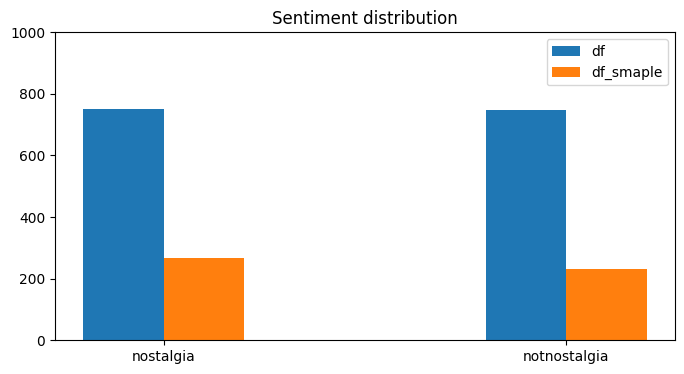

In [47]:
# get smaple data
df_sample = df.sample(n=500) #random state

l1, l2, l3 = [0,1], [0.2,1.2], [0.1,1.1]

plt.figure(figsize=(8, 4))
plt.bar(l1, df.sentiment.value_counts(), 0.2, label = 'df')
plt.bar(l2, df_sample.sentiment.value_counts(), 0.2, label = 'df_smaple')

plt.title('Sentiment distribution')
plt.xticks(ticks=l3, labels=['nostalgia', 'notnostalgia'], rotation=0, ha='center')
plt.ylim(0, 1000)
plt.legend()

plt.show()

In [48]:
# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [ ]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

In [60]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

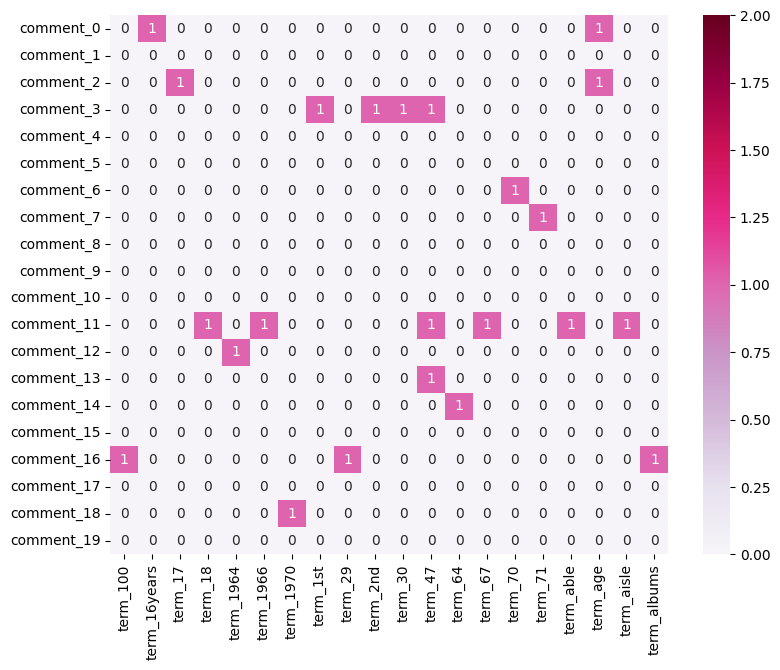

In [61]:
# Answer here

total = 0
arr = df_counts[0:20, 0:].toarray()
plot_x, plot_z = [], []
for i in range(20):
    tmp = []
    for i in range(20):
        tmp.append(-1)
    plot_z.append(tmp)

plot_y = ["comment_"+ str(i) for i in list(df.index)[0:20]]
for i in range(df_counts.shape[1]):
    flag = 0
    for j in range(20):
        plot_z[j][total] = arr[j][i]
        if arr[j][i] != 0:
            flag = 1

    if flag:
        total += 1
        plot_x.append("term_"+str(count_vect.get_feature_names_out()[i]))
        if total == 20:
            break

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)